# Machine Learning Pipeline
The work here expects that feature engineering has been applied to the data so all that needs to be done is reading in a data matrix and performing minimal preprocessing, feature selection, training, and performance metric ouptut. Everything is being done in a pipelien which runs straight from input to cv output, but I can fit it first and look at intermediate results if needed.
## Notes

## TODO
1. Open up some of the pipeline so you can look at intermediate results like features selected.
2. Can feature selection be done in a cv way so you can pass all the intersection of all features instead of performing 1 feature selection pass on the current training set
3. Save the output. Everything is in a dictionary so you should be able to save everything and access the best model through this dictionary. 
4. You'll need to perform permutation on the best model oen of these days
5. Set a seed everytime you perform k-fold shuffling so everything is trained on the same dataset.

In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from src.mlPipeline.modelTraining import performGridSearch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
dataPath = "data/MLData/inst_feature_matrix_non_syn_20180329.csv"
modelDictAll = performGridSearch(dataPath = dataPath)

Training randomForest
For Model randomForest:
	precision: 0.672
	f1: 0.643
	recall: 0.663
	accuracy: 0.62
Best Model Parameters {'RFC__max_depth': None, 'RFC__max_features': 0.5, 'RFC__criterion': 'gini', 'RFC__n_estimators': 10}
****************************************************************************************************
Training logistic
For Model logistic:
	precision: 0.656
	f1: 0.642
	recall: 0.646
	accuracy: 0.625
Best Model Parameters {'logistic__C': 100, 'logistic__penalty': 'l1'}
****************************************************************************************************
Training GBTC


/home/oliver/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/oliver/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


For Model GBTC:
	precision: 0.535
	f1: 0.697
	recall: 1.0
	accuracy: 0.535
Best Model Parameters {'GBTC__n_estimators': 50, 'GBTC__learning_rate': 0.001, 'GBTC__max_depth': 1}
****************************************************************************************************
Training SVC
For Model SVC:
	precision: 0.535
	f1: 0.697
	recall: 1.0
	accuracy: 0.535
Best Model Parameters {'SVC__C': 1, 'SVC__kernel': 'poly'}
****************************************************************************************************


In [57]:
# modelDictAll = modelDict

In [70]:
modelDictAll["GBTC"]

{'gridcv': GridSearchCV(cv=10, error_score='raise',
        estimator=Pipeline(memory=None,
      steps=[('feature_union', FeatureUnion(n_jobs=1,
        transformer_list=[('linSVC_dimReduction', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_st...      presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False))]),
        fit_params=None, iid=True, n_jobs=3,
        param_grid=[{'GBTC__n_estimators': [50, 100, 200, 300, 400, 500], 'GBTC__learning_rate': [0.001, 0.01, 0.1], 'GBTC__max_depth': [1, 3, 5, 10, 12]}],
        pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
        scoring=['accuracy', 'f1', 'precision', 'recall'], verbose=0),
 'params': [{'GBTC__learning_rate': [0.001, 0.01, 0.1],
   'GBTC__max_depth': [1, 3, 5, 10, 12],
   'GBTC__n_estimators': [50, 100, 200, 300, 400, 5

In [71]:
modelDictAll["SVC"]

{'gridcv': GridSearchCV(cv=10, error_score='raise',
        estimator=Pipeline(memory=None,
      steps=[('feature_union', FeatureUnion(n_jobs=1,
        transformer_list=[('linSVC_dimReduction', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_st...,
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))]),
        fit_params=None, iid=True, n_jobs=3,
        param_grid=[{'SVC__kernel': ['rbf', 'poly', 'sigmoid'], 'SVC__C': [1, 10, 100, 1000]}],
        pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
        scoring=['accuracy', 'f1', 'precision', 'recall'], verbose=0),
 'params': [{'SVC__C': [1, 10, 100, 1000],
   'SVC__kernel': ['rbf', 'poly', 'sigmoid']}],
 'pipe': Pipeline(memory=None,
      steps=[('feature_union', FeatureUnion(n_jobs=1,
        transformer_list=[('linS

In [67]:
from collections import defaultdict
def plotBestModelComparison(modelDictAll, scoring = ["f1", "recall", "precision"],
                            comparisonSubset = {"randomForest": "Random Forest",
                                                "logistic": "Logistic Regression",
                                                "GBTC": "Gradient Boosting Trees",
                                                "SVC":"Support Vector Classifier"}):
    assert set(comparisonSubset.keys()).issubset(set(modelDictAll.keys())),\
    "Comparison set is not a subset of the model set"
    scoringDict = defaultdict(lambda: defaultdict(float))
#     scoreMeans = defaultdict(list)
#     scoreStds = defaultdict(list)
    refitMetric = ""
    for modelName, modelDict in modelDictAll.items():
        refitMetric = modelDict["refitMetric"]
        currModelBestIdx = modelDict["gridcv"].best_index_
        for score in scoring:
            scoringDict[modelName][score + "_mean"] = modelDict["gridcv"].cv_results_["mean_test_" + score][currModelBestIdx]
            scoringDict[modelName][score + "_std"] = modelDict["gridcv"].cv_results_["std_test_" + score][currModelBestIdx]
    for score in scoring:
        scoreMeans = []
        scoreStds = []
        for modelName in list(comparisonSubset.keys()):
            scoreMeans.append(scoringDict[modelName][score + "_mean"])
            scoreStds.append(scoringDict[modelName][score + "_std"])
        print(score)
        print(np.round(scoreMeans, decimals = 3))
        print(np.round(scoreStds, decimals = 3))
        ind = np.arange(len(scoreMeans))
        fig=plt.figure(figsize=(9, 6), dpi= 300, facecolor='w', edgecolor='k')
        plt.bar(x = ind, height = scoreMeans, yerr = scoreStds)
        plt.xticks(ind, list(comparisonSubset.keys()))
        plt.ylim((0,1))
        plt.title("Best Model Based on {} for metric {}".format(refitMetric.upper(),
                                                                score.upper()))
    return(scoringDict)

f1
[0.643 0.642 0.697 0.697]
[0.088 0.116 0.01  0.01 ]
recall
[0.663 0.646 1.    1.   ]
[0.158 0.167 0.    0.   ]
precision
[0.672 0.656 0.535 0.535]
[0.131 0.104 0.012 0.012]


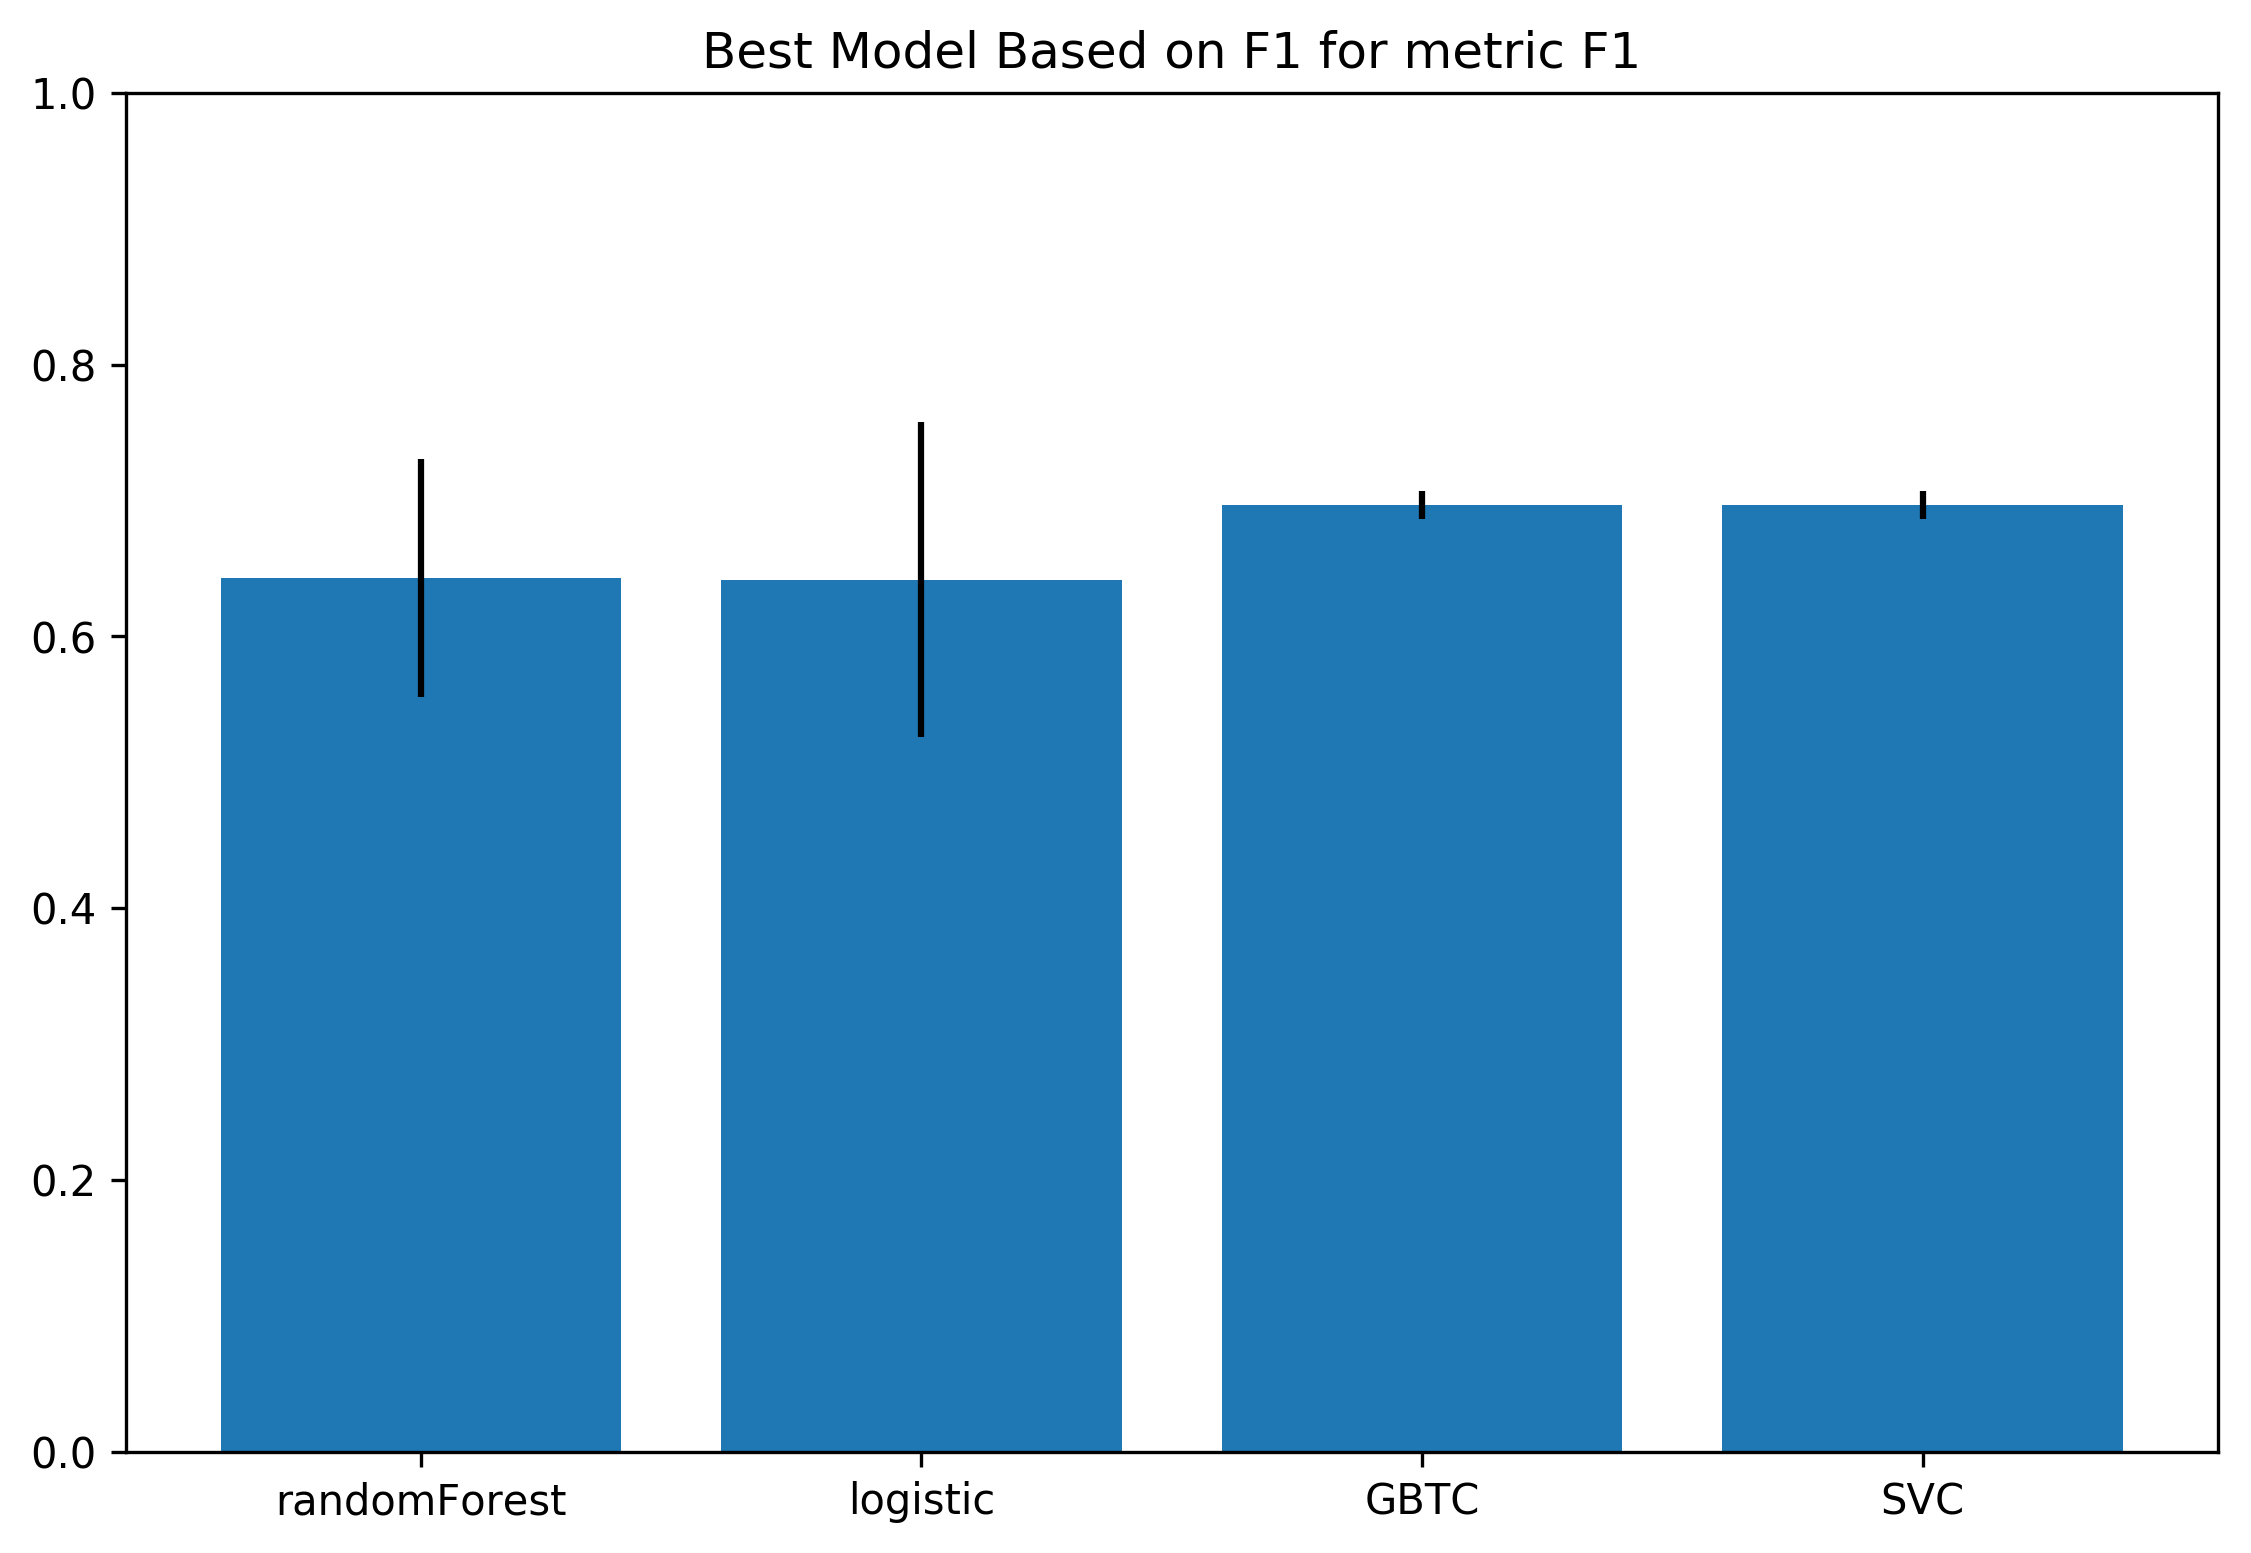

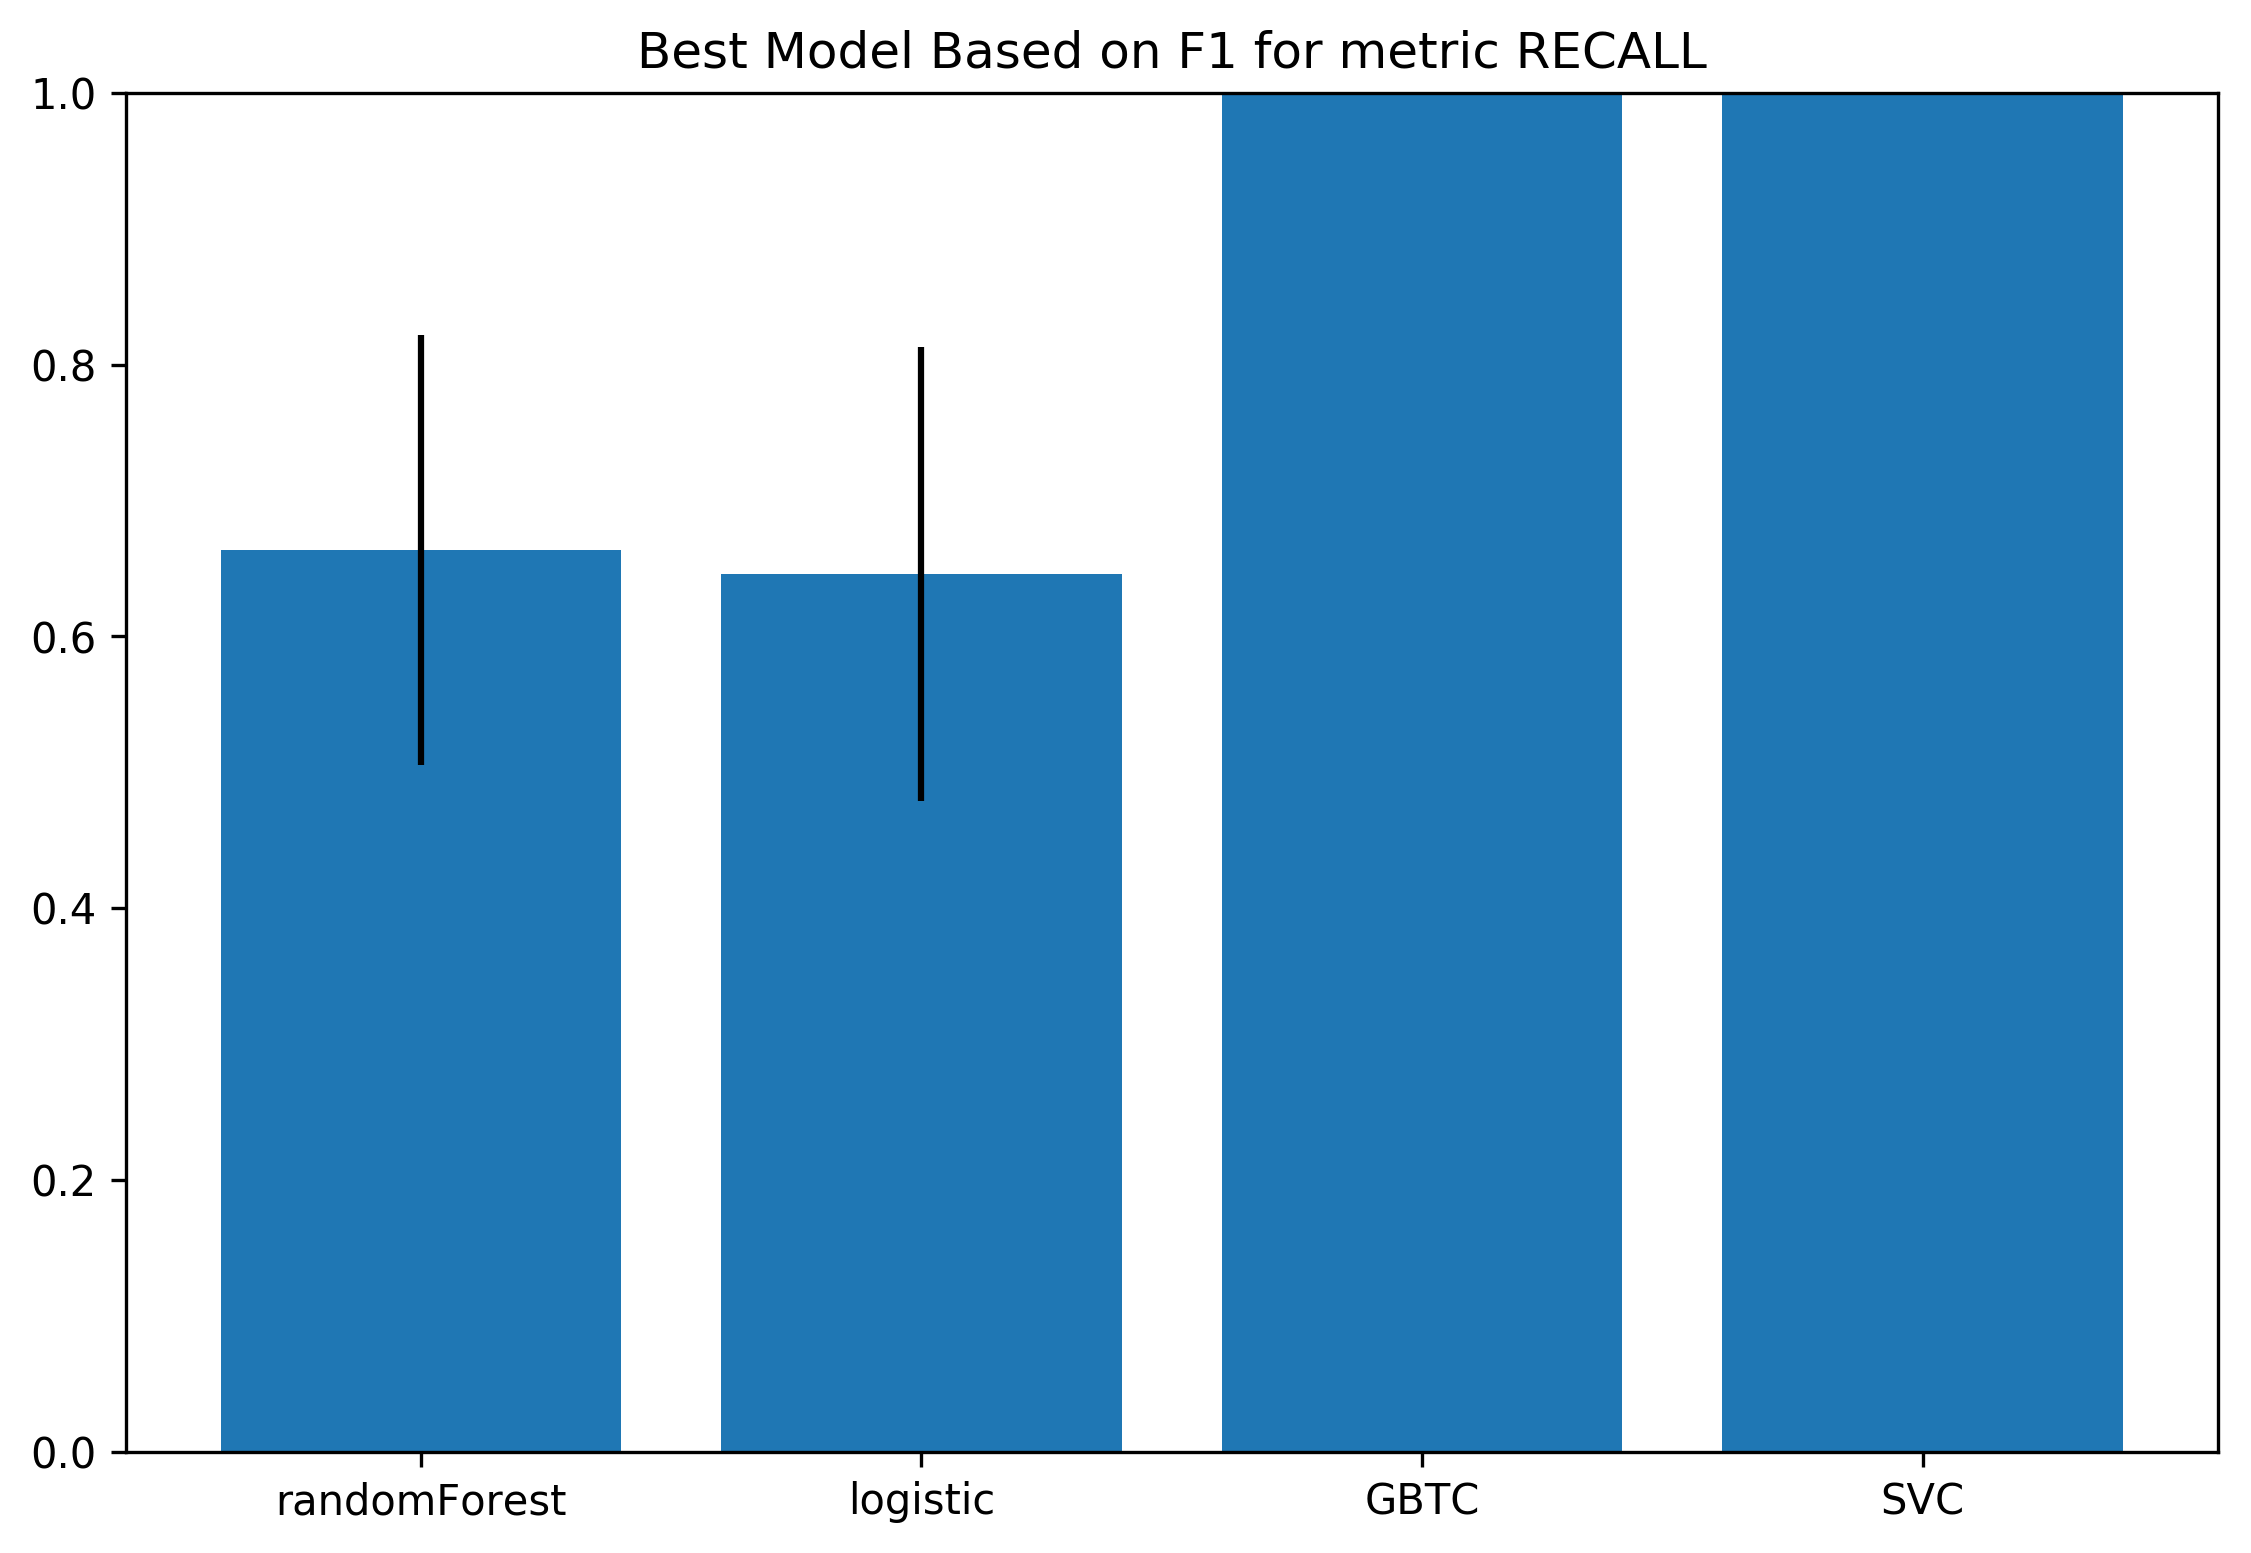

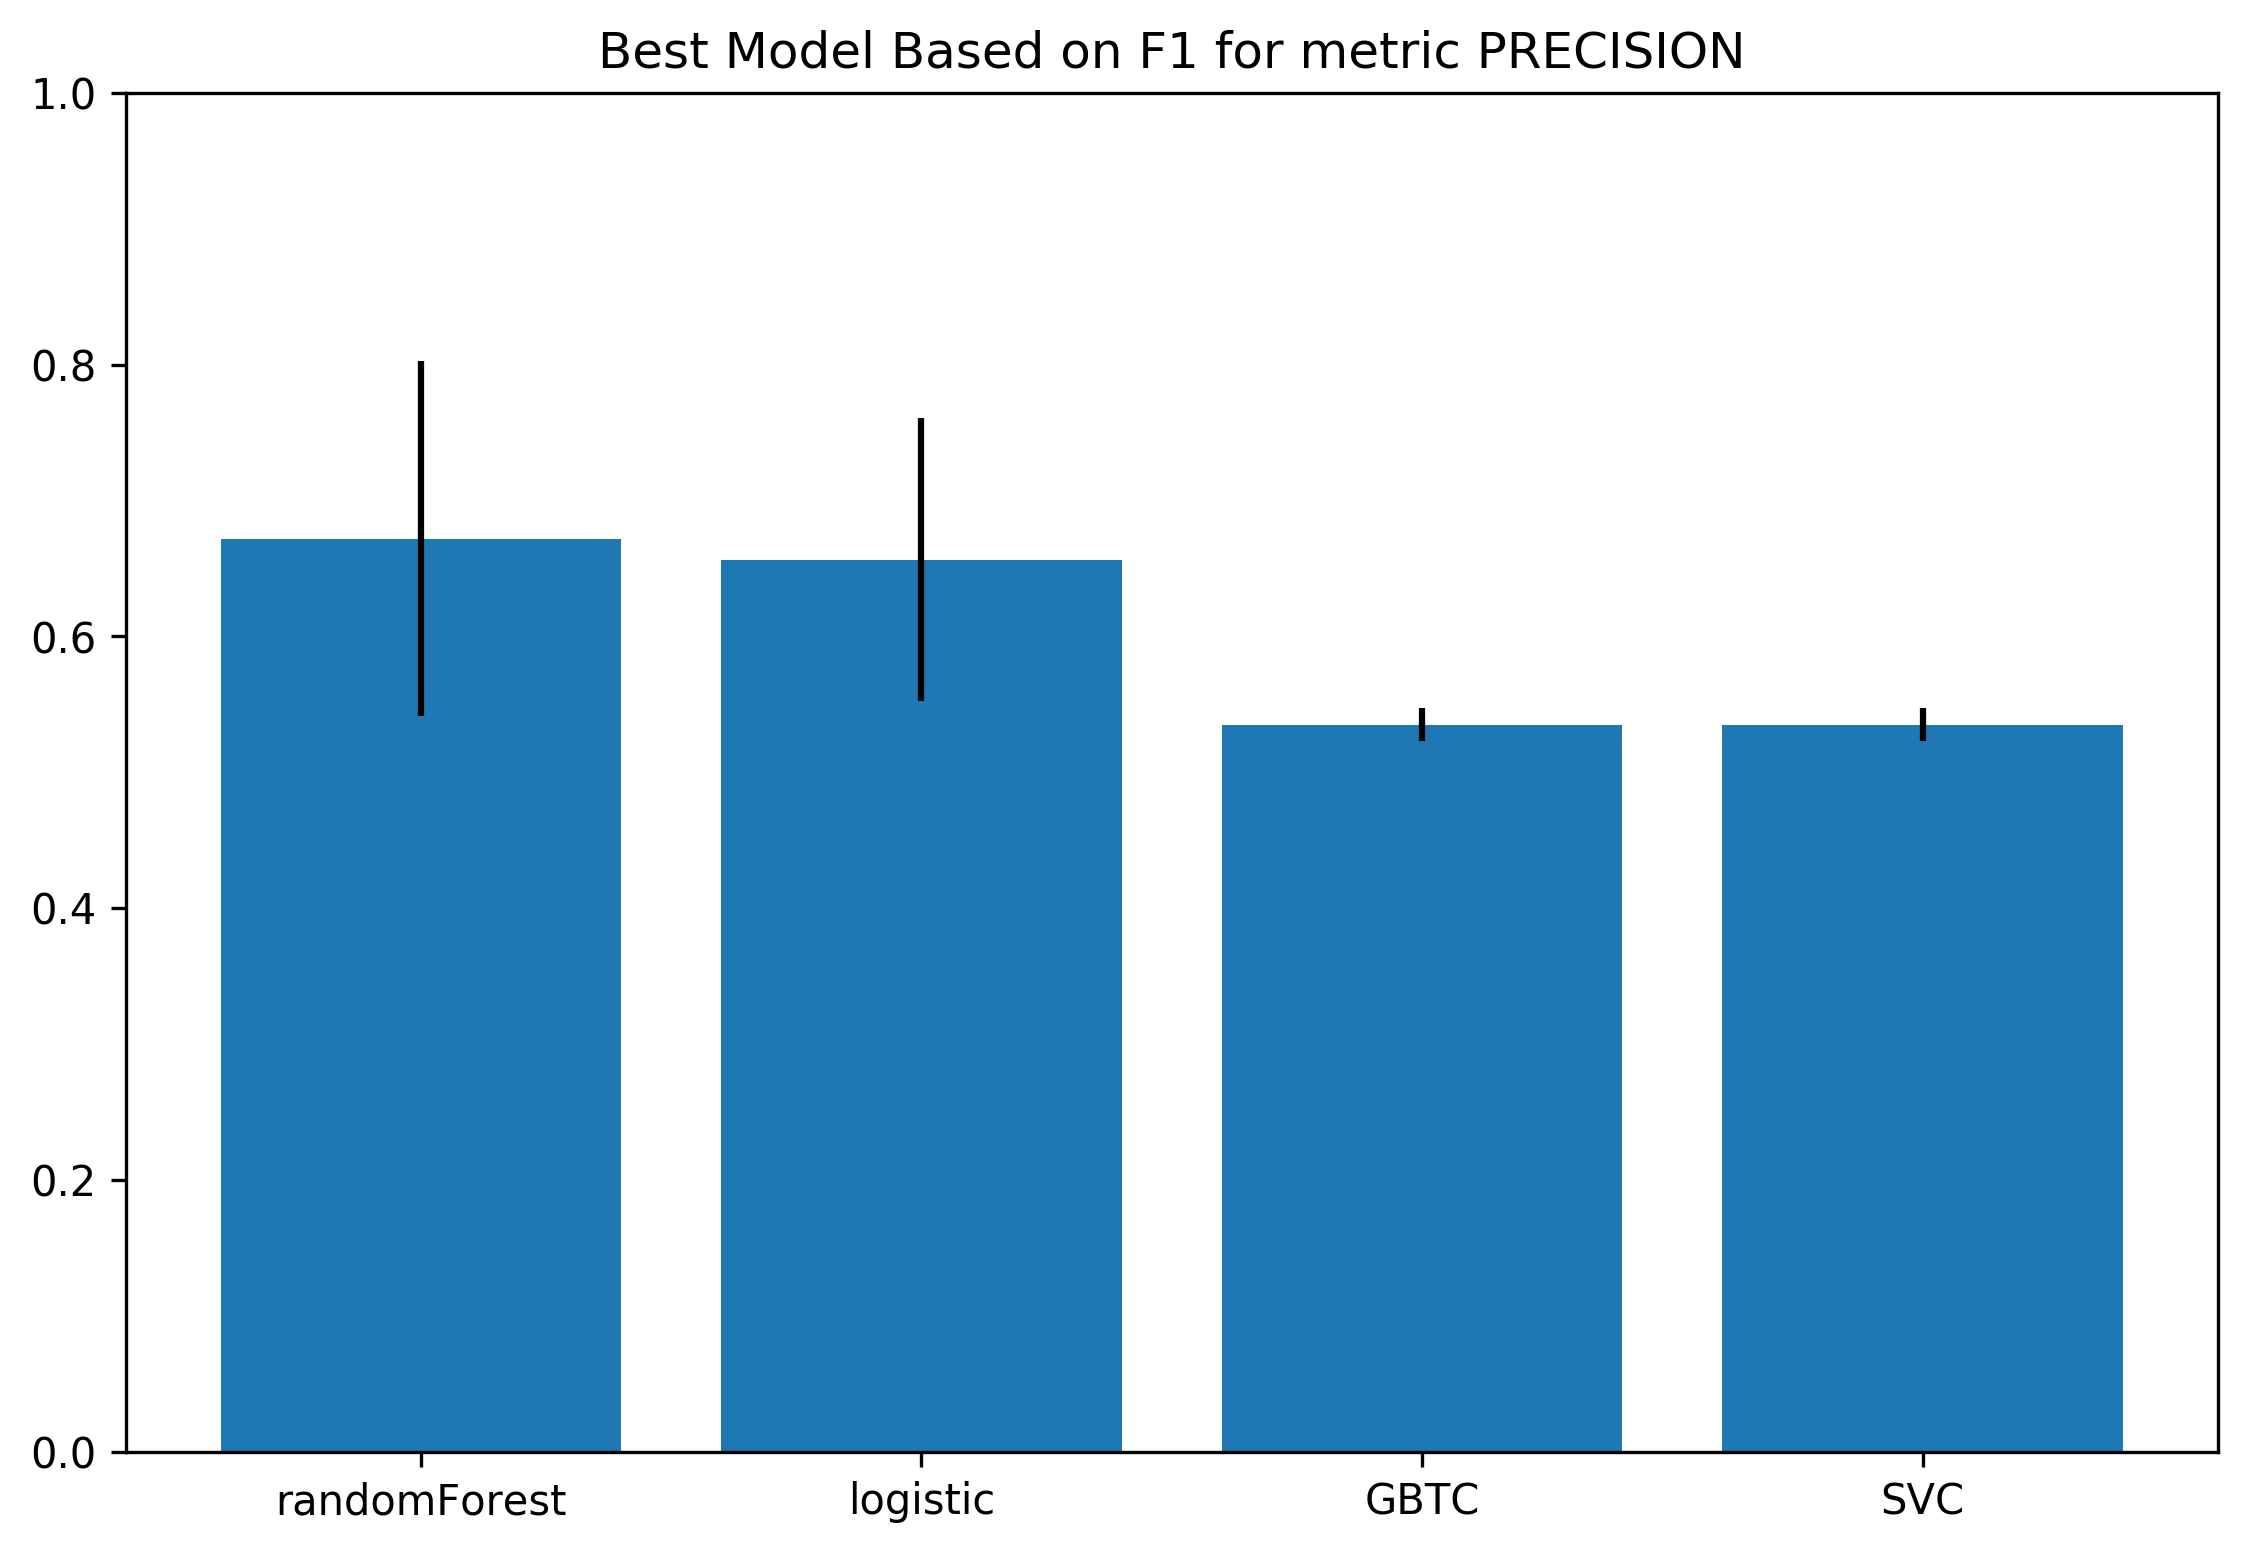

In [68]:
scoringDict = plotBestModelComparison(modelDictAll)

In [41]:
scoringDict

defaultdict(<function __main__.plotBestModelComparison.<locals>.<lambda>>,
            {'GBTC': defaultdict(float,
                         {'f1mean': 0.6969851918798666,
                          'f1std': 0.010396637226344796,
                          'precisionmean': 0.535,
                          'precisionstd': 0.01228575799957254,
                          'recallmean': 1.0,
                          'recallstd': 0.0}),
             'SVC': defaultdict(float,
                         {'f1mean': 0.6969851918798666,
                          'f1std': 0.010396637226344796,
                          'precisionmean': 0.535,
                          'precisionstd': 0.01228575799957254,
                          'recallmean': 1.0,
                          'recallstd': 0.0}),
             'logistic': defaultdict(float,
                         {'f1mean': 0.6417512626262627,
                          'f1std': 0.1157554626058721,
                          'precisionmean': 0.656480429292

In [9]:
temp.issubset(temp)

True

In [26]:
currModelBestIdx = modelDict["GBTC"]["gridcv"].best_index_

modelDict["GBTC"]["gridcv"].cv_results_.keys()

dict_keys(['split6_test_recall', 'rank_test_accuracy', 'split1_test_precision', 'split0_test_accuracy', 'rank_test_precision', 'split4_test_accuracy', 'split3_test_accuracy', 'split5_test_f1', 'params', 'split7_test_precision', 'mean_test_precision', 'mean_test_recall', 'split6_test_f1', 'mean_fit_time', 'split3_test_f1', 'split4_test_f1', 'std_score_time', 'param_GBTC__max_depth', 'split5_test_precision', 'rank_test_f1', 'split6_test_accuracy', 'param_GBTC__n_estimators', 'split3_test_recall', 'split1_test_recall', 'split5_test_accuracy', 'mean_test_f1', 'split2_test_f1', 'param_GBTC__learning_rate', 'mean_score_time', 'rank_test_recall', 'split5_test_recall', 'split0_test_precision', 'split9_test_precision', 'split6_test_precision', 'mean_test_accuracy', 'std_test_precision', 'split2_test_recall', 'std_test_accuracy', 'split8_test_accuracy', 'split4_test_recall', 'split7_test_recall', 'split7_test_accuracy', 'split1_test_f1', 'split4_test_precision', 'std_test_f1', 'split7_test_f1', 

In [63]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression, LassoCV, Lasso
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LassoCV
import numpy as np

## Read in the Data

In [3]:
dataPath = "../../data/MLData/inst_feature_matrix_non_syn_20180329.csv"

In [4]:
df = pd.read_csv(dataPath)
df = df.set_index("isolate")
X_df = df.drop(labels = ["pbr_res"], axis = 1)
X = X_df.values
Y_df = df["pbr_res"]
Y = Y_df.values

## Feature Selection

In [69]:
# feature selection union
# unused right now
features = []
# features.append(('pca', PCA(n_components=3)))
# features.append(('select_best', SelectKBest(k=6)))
# clf = LassoCV()

# Set a minimum threshold of 0.25
features.append(("linSVC_dimReduction", SelectFromModel(LinearSVC(), 0.25)))
# features.append(("lasso_dimReduction", SelectFromModel(LassoCV(), 0.25)))
# features.append(SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False),
#                                 threshold=0.25, prefit = False))
feature_union = FeatureUnion(features)
featureSelectionParamGrid = {} # TODO implement feature selection for feature selection.

## Models

In [70]:
modelDict = {}
cv = 10
n_jobs = 3
# TODO when you perform CV with this stuff consider doing memory option stuff
scoring = ["accuracy", "f1", "precision", "recall"]
importantMetric = "f1"



# create pipeline for logisttic Regression
estimators_LR = []
estimators_LR.append(('feature_union', feature_union))
estimators_LR.append(('logistic', LogisticRegression()))
# estimators.append(models)
paramGrid_LR = [
    {
        "logistic__penalty": ['l1', 'l2'],
        "logistic__C": [1, 10, 100, 1000]
    }
]
modelDict["logistic"] = {"pipe": Pipeline(estimators_LR),
                         "params": paramGrid_LR}
modelDict["logistic"]["gridcv"] = GridSearchCV(estimator = modelDict["logistic"]["pipe"],
                         param_grid = modelDict["logistic"]["params"],
                         cv = cv, n_jobs = n_jobs, return_train_score = False,
                         scoring = scoring, refit = importantMetric)
# TODO understand how linearSVC works with these parameters




# create pipeline for RF
estimators_RF = []
estimators_RF.append(('feature_union', feature_union))
estimators_RF.append(('RFC', RandomForestClassifier()))
# estimators.append(models)
paramGrid_RF = [
    {
        "RFC__n_estimators": [5, 10, 15, 20],# second most important feature to tune. First
        # is max number of feats.
        "RFC__max_features": ["sqrt", "log2", 0.5],# we have lots of possibly dumb
        # features so it might be good to use lower numbers here
        "RFC__max_depth": [None],# still need to understand if deeper trees are better.
        "RFC__criterion":["gini"],# no idea if this will make a difference. can check
    }
]

modelDict["randomForest"] = {"pipe": Pipeline(estimators_RF),
                             "params": paramGrid_RF}
modelDict["randomForest"]["gridcv"] = GridSearchCV(estimator = modelDict["randomForest"]["pipe"],
                       param_grid = modelDict["randomForest"]["params"],
                       cv = cv, n_jobs = n_jobs, return_train_score = False,
                       scoring = scoring, refit = importantMetric)
#TODO is it better to build RF trees to purity and prune?





# Create pipeline for SVC
estimators_SVC = []
estimators_SVC.append(('feature_union', feature_union))
estimators_SVC.append(('SVC', SVC()))
# estimators.append(models)
paramGrid_SVC = [
    {
        "SVC__kernel": ['rbf', 'poly', "sigmoid"],
        "SVC__C": [1, 10, 100, 1000]
    }
]
modelDict["SVC"] = {"pipe":Pipeline(estimators_SVC),
                    "params": paramGrid_SVC}
modelDict["SVC"]["gridcv"] = GridSearchCV(estimator = modelDict["SVC"]["pipe"],
                       param_grid = modelDict["SVC"]["params"],
                       cv = cv, n_jobs = n_jobs, return_train_score = False,
                       scoring = scoring, refit = importantMetric)



# create pipeline for GBTC
estimators_GBTC = []
estimators_GBTC.append(('feature_union', feature_union))
estimators_GBTC.append(('GBTC', GradientBoostingClassifier()))
# estimators.append(models)
paramGrid_GBTC = [
    {
        "GBTC__learning_rate": [0.001, 0.01, 0.1],
        "GBTC__n_estimators": [50, 100, 200, 300, 400, 500],
        "GBTC__max_depth": [1, 3, 5, 10, 12]
    }
]
modelDict["GBTC"] = {"pipe": Pipeline(estimators_GBTC),
                     "params": paramGrid_GBTC}
modelDict["GBTC"]["gridcv"] = GridSearchCV(estimator = modelDict["GBTC"]["pipe"],
                       param_grid = modelDict["GBTC"]["params"],
                       cv = cv, n_jobs = n_jobs, return_train_score = False,
                       scoring = scoring, refit = importantMetric)
# modelDict["gradientBosting"] = Pipeline(estimators_GBTC)

In [71]:
modelDict.keys()

dict_keys(['logistic', 'randomForest', 'SVC', 'GBTC'])

In [72]:
def printBestModelStatistics(gridScoresCV, scoring, modelName):
    scoringDict = {}
    bestModelIndex = currModelDict["gridcv"].best_index_
    for score in scoring:
        scoringDict[score] = gridScoresCV["mean_test_" + score][bestModelIndex]
        outStr = "For Model {}:".format(modelName)
    for scoreName, scoreVal in scoringDict.items():
        outStr += "\n\t{}: {}".format(scoreName, np.round(scoreVal, decimals = 3))
    print(outStr)  

In [76]:
for modelName, currModelDict in modelDict.items():
    print("Training {}".format(modelName))
    currModelDict["gridcv"].fit(X,Y)
    printBestModelStatistics(gridScoresCV = currModelDict["gridcv"].cv_results_,
                         scoring = scoring, modelName = modelName)
    print("Best Model Parameters {}".format(currModelDict["gridcv"].best_params_))
    print("*"*100)
#     break

Training logistic
For Model logistic:
	accuracy:0.625
	f1:0.642
	precision:0.656
	recall:0.646
Best Model Parameters {'logistic__C': 100, 'logistic__penalty': 'l1'}
****************************************************************************************************
Training randomForest
For Model randomForest:
	accuracy:0.615
	f1:0.633
	precision:0.63
	recall:0.654
Best Model Parameters {'RFC__criterion': 'gini', 'RFC__max_depth': None, 'RFC__max_features': 0.5, 'RFC__n_estimators': 5}
****************************************************************************************************
Training SVC
For Model SVC:
	accuracy:0.535
	f1:0.697
	precision:0.535
	recall:1.0
Best Model Parameters {'SVC__C': 1, 'SVC__kernel': 'poly'}
****************************************************************************************************
Training GBTC


/home/ob2285/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ob2285/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


For Model GBTC:
	accuracy:0.535
	f1:0.697
	precision:0.535
	recall:1.0
Best Model Parameters {'GBTC__learning_rate': 0.001, 'GBTC__max_depth': 1, 'GBTC__n_estimators': 50}
****************************************************************************************************


In [74]:
currModelDict["gridcv"].best_params_

{'GBTC__learning_rate': 0.001, 'GBTC__max_depth': 1, 'GBTC__n_estimators': 50}

In [75]:
currModelDict["gridcv"].best_estimator_

Pipeline(memory=None,
     steps=[('feature_union', FeatureUnion(n_jobs=1,
       transformer_list=[('linSVC_dimReduction', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_st...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))])

In [20]:
currModelDict["gridcv"].cv_results_["mean_test_f1"]

array([ 0.60934862,  0.60539875,  0.63101533,  0.60208662,  0.64175126,
        0.63199824,  0.64175126,  0.6360675 ])

In [27]:
gridScoresCV = currModelDict["gridcv"].cv_results_
modelName = "Logistic"
scoringDict = {}
bestModelIndex = currModelDict["gridcv"].best_index_
for score in scoring:
    scoringDict[score] = gridScoresCV["mean_test_" + score][bestModelIndex]
outStr = "For Model {}:".format(modelName)
for scoreName, scoreVal in scoringDict.items():
    outStr += "\n\t{}:{}".format(scoreName, np.round(scoreVal, decimals = 3))
print(outStr)
def printBestModelStatistics(gridScoresCV, scoring, modelName):
    scoringDict = {}
    bestModelIndex = currModelDict["gridcv"].best_index_
    for score in scoring:
        scoringDict[score] = gridScoresCV["mean_test_" + score][bestModelIndex]
        outStr = "For Model {}:".format(modelName)
    for scoreName, scoreVal in scoringDict.items():
        outStr += "\n\t{}:{}".format(scoreName, np.round(scoreVal, decimals = 3))
    print(outStr)  

For Model Logistic:
	accuracy:0.625
	f1:0.642
	precision:0.656
	recall:0.646


In [28]:
printBestModelStatistics(gridScoresCV = currModelDict["gridcv"].cv_results_,
                         scoring = scoring, modelName = modelName)

For Model Logistic:
	accuracy:0.625
	f1:0.642
	precision:0.656
	recall:0.646


In [66]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
scoring = ["accuracy", "f1", "precision", "recall"]
metrics = {}
for modelName, model in modelDict.items():
#     print(model)
    results = cross_validate(model, X, Y, cv=kfold,  scoring=scoring, )
#     results = cross_val_score(estimator=model,
#                               X=features,
#                               y=labels,
#                               cv=kfold,
#                               scoring=scoring)
#     break
    for idx, metric in enumerate(scoring):
        metrics[metric] = results["test_"+metric].mean()
#     accMean = results["test_"+scoring[idx]].mean()
    print("Metrics for {}".format(modelName))
    print(metrics)
    print("\n")
#     break
# kfold = KFold(n_splits=10, random_state=seed)
# results = cross_val_score(model, X, Y, cv=kfold)
# print(results.mean())

Metrics for logistic
{'accuracy': 0.55999999999999994, 'f1': 0.50657429607429605, 'precision': 0.61407661782661782, 'recall': 0.51237412913883507}


Metrics for randomForest
{'accuracy': 0.53499999999999992, 'f1': 0.47718709972744716, 'precision': 0.5924009324009325, 'recall': 0.46138116785175615}


Metrics for SVC
{'accuracy': 0.35999999999999999, 'f1': 0.504621863504922, 'precision': 0.49444444444444435, 'recall': 0.80264705882352949}


Metrics for gradientBosting
{'accuracy': 0.55999999999999994, 'f1': 0.49615496098104794, 'precision': 0.54168831168831166, 'recall': 0.49498383968972204}




In [65]:
results

{'fit_time': array([ 0.08118463,  0.07761335,  0.08058453,  0.07894659,  0.07932329,
         0.07868505,  0.08367991,  0.08803058,  0.08775806,  0.08080649]),
 'score_time': array([ 0.00208187,  0.00207233,  0.00208974,  0.00207472,  0.00207257,
         0.00202703,  0.00224113,  0.00220537,  0.00201702,  0.00197744]),
 'test_accuracy': array([ 0.8 ,  0.35,  0.6 ,  0.35,  0.65,  0.55,  0.6 ,  0.45,  0.5 ,  0.75]),
 'test_f1': array([ 0.85714286,  0.48      ,  0.75      ,  0.51851852,  0.69565217,
         0.52631579,  0.33333333,  0.26666667,  0.        ,  0.61538462]),
 'test_precision': array([ 0.75      ,  0.4       ,  0.8       ,  1.        ,  0.8       ,
         0.5       ,  0.4       ,  0.25      ,  0.        ,  0.57142857]),
 'test_recall': array([ 1.        ,  0.6       ,  0.70588235,  0.35      ,  0.61538462,
         0.55555556,  0.28571429,  0.28571429,  0.        ,  0.66666667]),
 'train_accuracy': array([ 0.88888889,  0.86666667,  0.88333333,  0.88333333,  0.87777778,
  

In [42]:
results

array([0.75, 0.35, 0.7 , 0.6 , 0.4 , 0.55, 0.65, 0.5 , 0.7 , 0.85])

In [39]:
model = Pipeline(estimators_GBTC)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.5900000000000001


In [36]:
model

Pipeline(memory=None,
     steps=[('GBTC', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))])

In [8]:
np.mean(Y)

0.535

In [33]:
modelDict

{'SVC': Pipeline(memory=None,
      steps=[('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))]), 'gradientBosting': Pipeline(memory=None,
      steps=[('GBTC', GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False))]), 'logistic': Pipeline(memory=None,
      steps=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max